# Using Visualization for Detective Work

**Objectives**: Use Python visualization approaches to solve a mystery using data science. This notebook covers the following:
  
* Different visualization tools
* Using Python's Matplotlib, pandas, and seaborn to plot example data

## Data Visualization Tools

Visualization is an indispensable tool in data science. While most patterns and results can be described mathematically, visuals are often best for developing an intuitive understanding of the meaning behind the data. When presenting data science results, visuals are often the only tool that can be used with a general audience that lacks an analytical background.

Most data scientists use a variety of visualization approaches and tools. Depending on the task at hand, some are better tools than others. The following represent a sample of some of the more common tools.


**Commercial Visualization Products**

These products are a category of easier to use tools that require little programming experience, but offer robust visualization.

* **[Tableau](http://www.tableau.com/products/desktop):** Tableau is a popular choice for data exploration and analysis.

**Web Technologies**

* **[D3](http://d3js.org/):** D3 is a Javascript library which enables web based visualizations using HTML elements like SVG and CSS. 

**Programmatic Visualization APIs**

* **[Plotly](https://plot.ly/):** Plotly is a web-based visualization solution that recently open sourced its core plotly.js library. Unlike D3, Plotly also has Python and R APIs which don't require any programming in javascript. Plotly focuses on interactive plots unlike Matplotlib, ggplot(R plotting), and Matlab which tend to be more static.

**Programming Libraries**

* **[Matplotlib](http://matplotlib.org/):** Modeled after Matlab, Matplotlib is the standard for Python scientific visualizations.
* **[ggplot2](http://docs.ggplot2.org/current/):** ggplot2 is the standard plotting library for R. 


## Matplotlib

In today's lab, we are going to review the basics of Matplotlib. There are a variety of free tutorials including those here: https://matplotlib.org/stable/tutorials/index


Matplotlib is quite flexible and is capable of most scientific visualizations as can be seen in its gallery.

* http://matplotlib.org/gallery.html

**Basic Plots**

Next, let's import <code>pyplot</code> which is the state machine interface to the Matplotlib library. The state machine allows us to iteratively create a plot by successive function calls that define different elements of the plot.

We will also import <code>pandas</code> and read in the iris dataset. Pandas allows us to work with tabular data similar to how we might use a spreadsheet. We call this tabluar data a dataframe.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv('datasets/iris_data.csv')

In [2]:
# This sets the default size for our plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10.0, 10.0)

We can view the dataframe by printing the dataframe we assigned to ```df```.

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<code>pandas</code> has several built in plotting functions that allow you to call plots on the dataframe versus using the dataframe as a parameter of <code>pyplot</code>.  The following codeblocks will demonstrate both approaches.

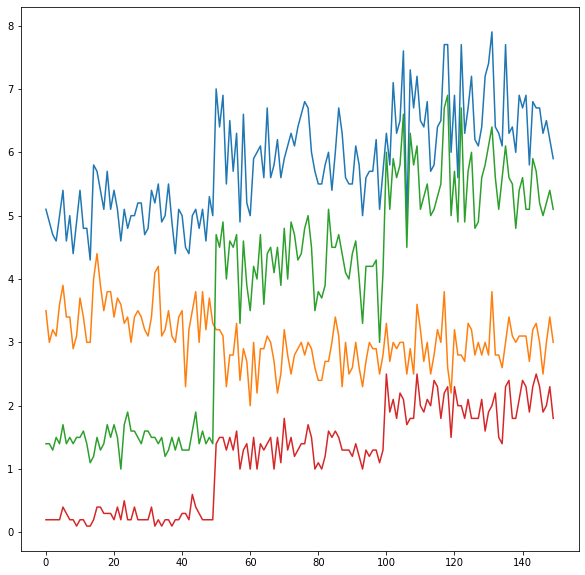

In [4]:
# Plot using pyplot
# The default plot type is a line plot
# 0:4 specifies that we will plot the first 4 columns

plt.plot(df.iloc[:,0:4])


While the plots use the same data, the <code>pandas</code> function conveniently adds additional element to the plot based on the dataframe structure including the column names and index. Both methods use matplotlib on the backend. Links to both sets of documentation are below:

* **pandas plotting:** http://pandas.pydata.org/pandas-docs/stable/visualization.html
* **Pyplot plotting:** https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

Next, we will go through several different examples. Keep in mind that given the <code>pandas</code> approach uses Matplotlib, the two approaches can work together.

# Plotting using the pandas dataframe

The general convention using pandas to plot is to add ```.plot()``` to a dataframe. The following code block demonstrates this with a scatter plot. You can also use the same format for these different plot types by replacing ```scatter```.

* ‘bar’ or ‘barh’ for bar plots
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or ‘density’ for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots

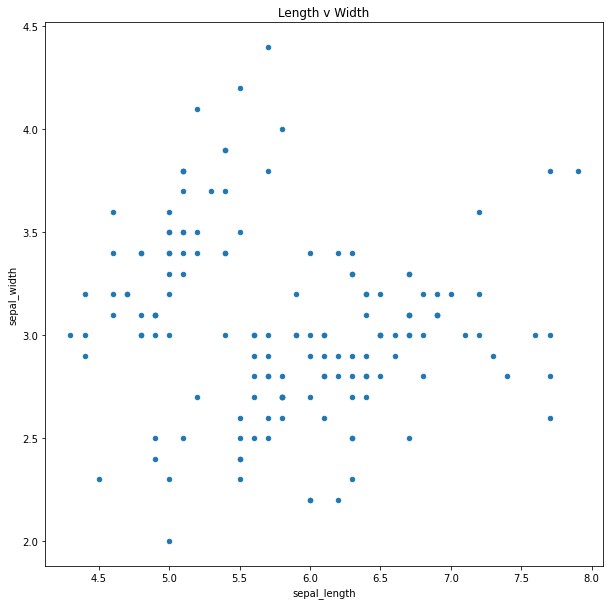

In [5]:
# Creates a figure and plots a scatter plot on x and y inputs
# The parameter "s" is for the point size
# The semicolon at the end of the line surpresses the printing of axes data before the plot. 
# Try taking it off and running again.

df.plot(kind='scatter', x='sepal_length', y='sepal_width', title="Length v Width");


**Plotting Distributions**

Next, let's use the <code>plt</code> style plotting to construct a histogram of our data. Histograms are a useful way to view the dispersion of a distribution of data points.

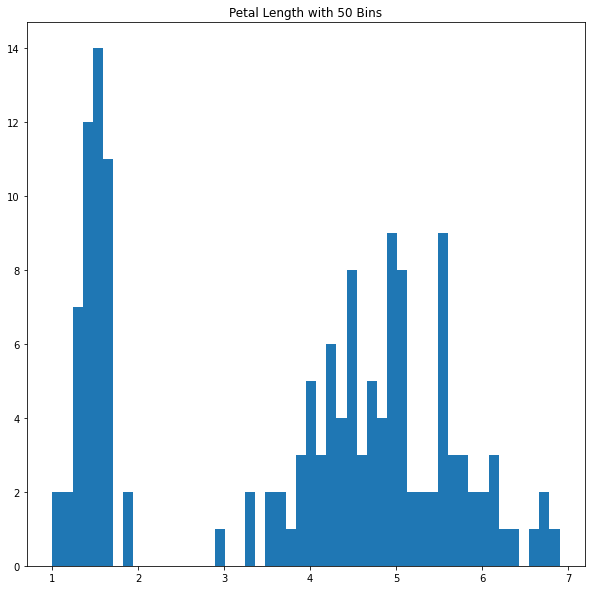

In [6]:
plt.figure('hist #1')
plt.title('Petal Length with 50 Bins')
plt.hist(df['petal_length'], bins=50);

Change the code in the codeblock above to create a plot of petal width and rerun. Note that the value for <code>bins</code> can be an important component of how the histogram appears and has been criticized as a method given larger bins might obscure the underlying distribution.

Kernel Density Estimation is an alternative approach to visualizing distributions.

* https://en.wikipedia.org/wiki/Kernel_density_estimation

<code>pandas</code> has a built in method for this as well, but the scikit-learn package is much more robust. The following link details this package and some of the problems of histograms.

* http://scikit-learn.org/stable/modules/density.html

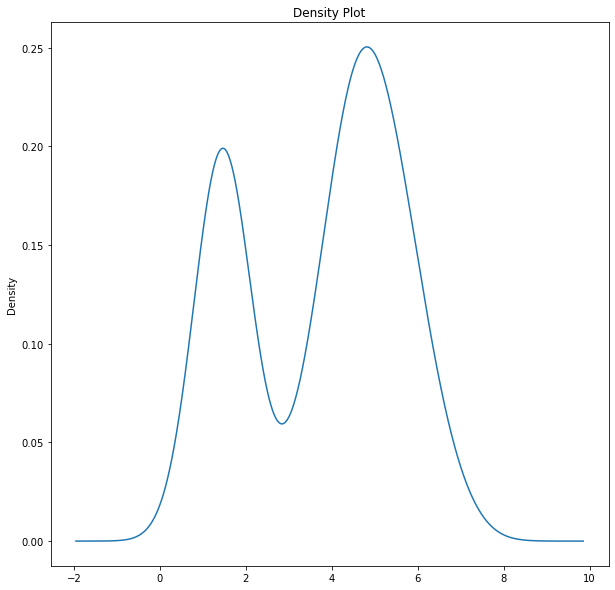

In [7]:
df['petal_length'].plot(kind='kde', title="Density Plot");

As you might guess, the <code>kind</code> parameter in the <code>pandas</code> style plotting allow you to define many other options including line, bar, and pie.

For multidimensional data like the iris dataset, a scatter matrix is an excellent way to visualize the correlation between variables. <code>pandas</code> has a built in function which is easy to apply to our dataset.

Run the code in the next codeblock.

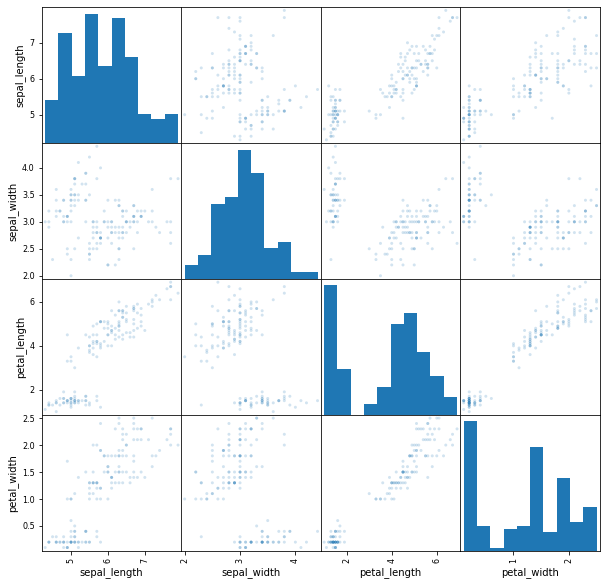

In [8]:
pd.plotting.scatter_matrix(df, alpha=0.2);


Boxplots, as we saw previously, are also an excellent way to plot distributions. Details of what makes up a boxplot are here:

* http://www.physics.csbsju.edu/stats/box2.html

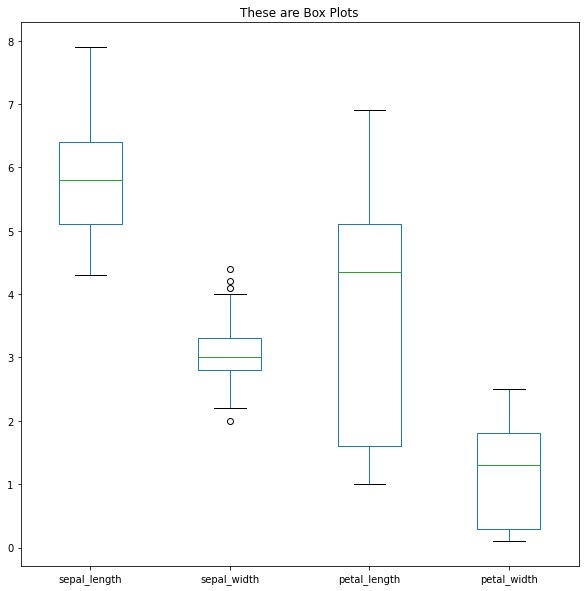

In [9]:
df.plot(kind='box', title="These are Box Plots");

**Seaborn for Style and Complex Plots**

The Python seaborn library is yet another option for plotting which offers a high level interface into Matplotlib for plotting.

* http://stanford.edu/~mwaskom/software/seaborn/

Seaborn can change the style of any matplotlib plot to follow its themes:

* http://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html#aesthetics-tutorial

It also has several useful plot types that have a clean high level interface. For example, we can use a dataframe of mean values to create an annotated heat map of average values for our dataset. Try that in the next codeblock.

Text(0.5, 1.0, 'Heatmap by Average Values')

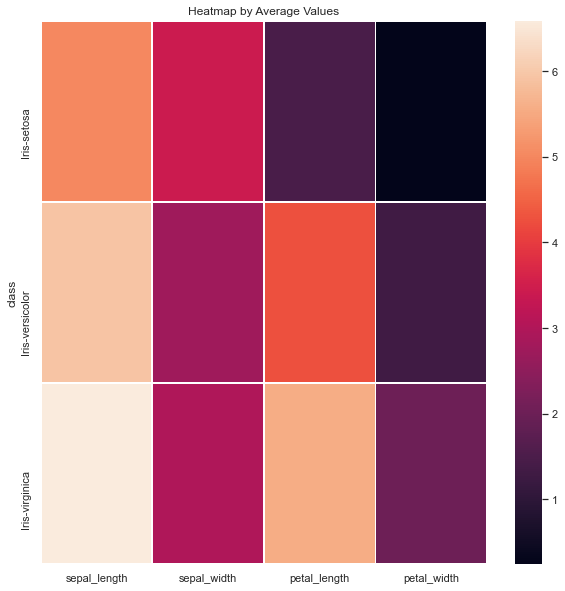

In [10]:
import seaborn as sns
sns.set(style="white")
plt.figure('Heatmap')
groups = df.groupby('class')
sns.heatmap(groups.mean(), annot=False, linewidths=1)
plt.title('Heatmap by Average Values')

Seaborn can also create one or two dimensional kernel density plots:

* http://stanford.edu/~mwaskom/software/seaborn/examples/distplot_options.html
* http://stanford.edu/~mwaskom/software/seaborn/examples/joint_kde.html

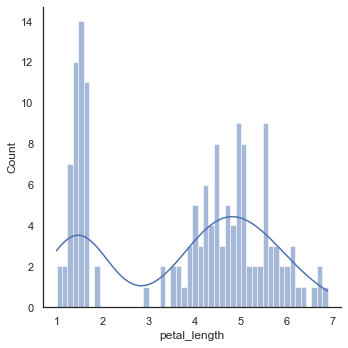

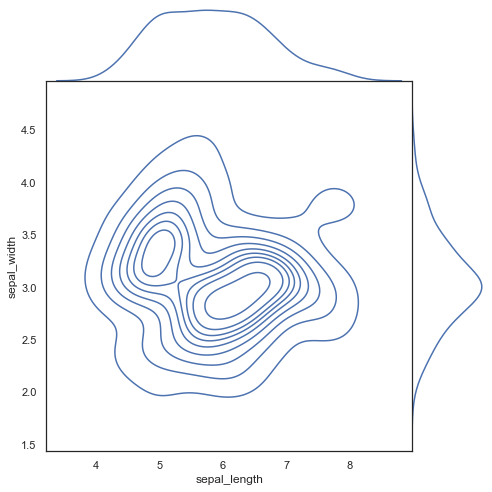

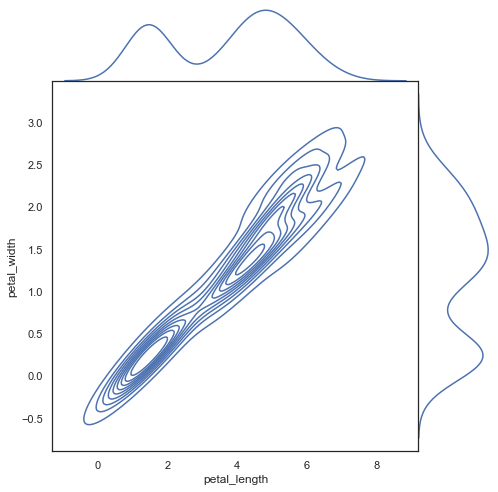

In [11]:
#plt.figure('Petal Length with KDE and Histogram')
#plt.title('Distribution of Petal Length Histogram and KDE')
sns.displot(df['petal_length'], kde=True, color="b", bins=50);
sns.jointplot(data=df,x='sepal_length',y= 'sepal_width', kind='kde', height=7, space=0);
sns.jointplot(data=df, x='petal_length',y='petal_width', kind='kde', height=7, space=0);

Seaborn also has its version of a scatter matrix.

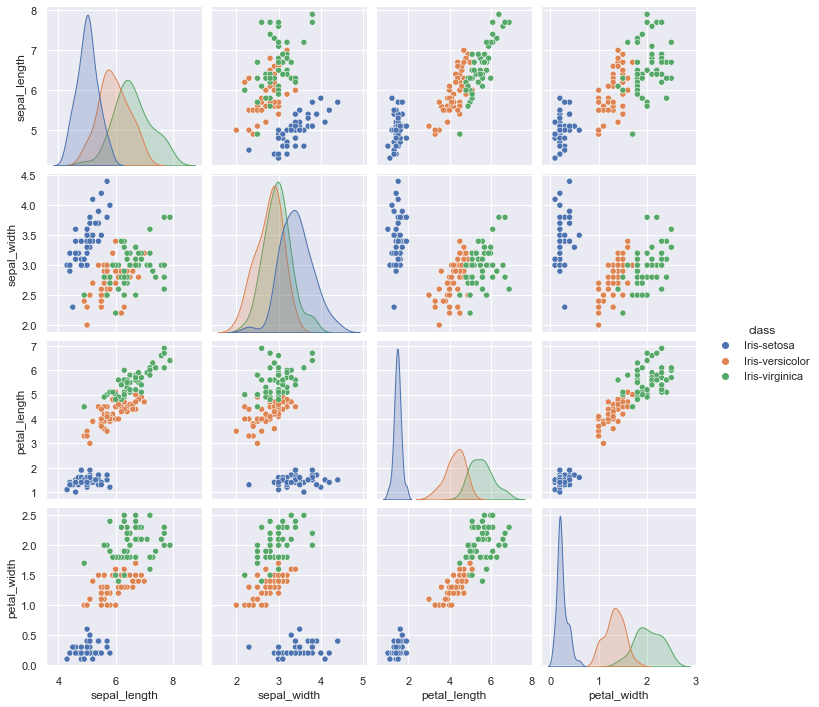

In [12]:
# Seaborn calls the scatter matrix a pairplot.
sns.set(style='darkgrid')
sns.pairplot(df, hue='class')

**Plotting Mathematical Functions**

Matplotlib can also be used to easily plot mathematical functions with both points and a line.

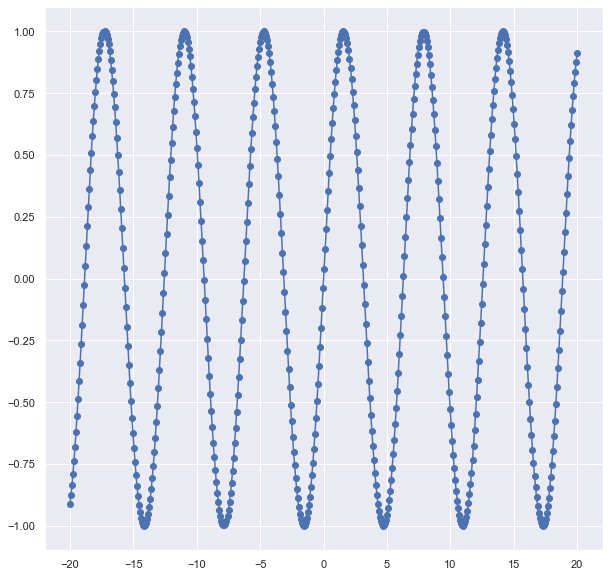

In [13]:
import numpy as np

# Use numpy to build a vector of 100 equally spaced points between -20 and 20
x = np.linspace(-20,20,500)

# Use numpy to calculate the sin of the x vector
y = np.sin(x)

# Plot the individual points using blue ('b') circles ('o')
plt.figure('Functions')
plt.plot(x,y,'bo')

# Plot the line through the circles
plt.plot(x,y)

**Subplots**

Often it is useful to use subplots to have multiple plots in the same figure. 

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot

The key to creating such plots is using the <code>plt.subplot</code> function to define the number of subplots and where each individual plot goes within a matrix of subplots.

The basic subplot syntax is as follows:
```
plt.subplot(number of subplot rows, number of subplot columns, the sequence number of this subplot)
```
Note that the sequence number is one-based (rather than the typical zero-based Python index) given its roots in Matlab. 

Subplots often require adjusting the spacing among them which can be accomplished with the <code>plt.subplots_adjust</code> function.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots_adjust

The following code plots two subplots of the iris data with the range of axes being different for each plot.

Text(0, 0.5, 'Petal Width')

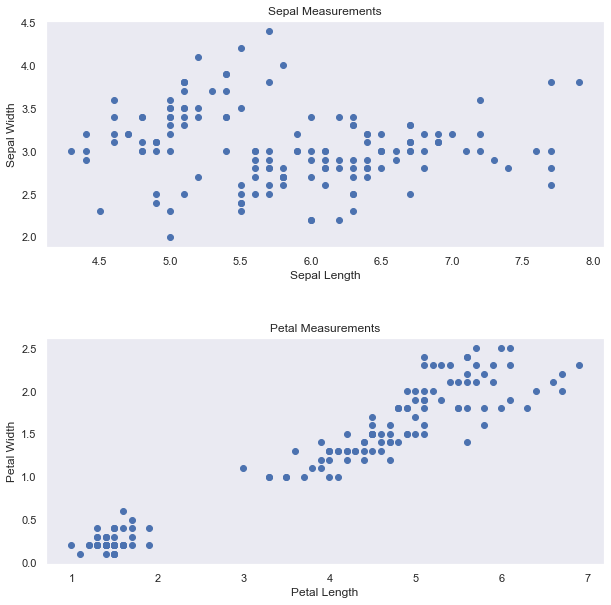

In [14]:
plt.figure('Plots of Sepals and Petals')
plt.subplots_adjust(hspace=.4)
plt.subplot(2,1,1)
plt.title('Sepal Measurements')
plt.scatter(x=df['sepal_length'], y=df['sepal_width'])
plt.grid()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.subplot(2,1,2)
plt.title('Petal Measurements')
plt.scatter(x=df['petal_length'], y=df['petal_width'])
plt.grid()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width') 